In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# load the data set

In [11]:
import pandas as pd
df = pd.read_csv(r"C:\Users\SURA\Downloads\Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


# Clean the Data

In [12]:
# Step 1: Strip whitespace from column names
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces
# Rename 'latitu' to 'latitude' for clarity
df.rename(columns={'latitu': 'latitude'}, inplace=True)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())

# Fill missing values with the mean of each numeric column
df = df.fillna(df.mean(numeric_only=True))


Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64


C:\Users\SURA\AppData\Local\Temp\ipykernel_17808\3008647542.py:7: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


# Exploratory Data Analysis (EDA)

**A. Basic Statistics**

In [13]:
print(df.describe())

                                Date  Estimated Unemployment Rate (%)  \
count                            267                       267.000000   
mean   2020-06-16 09:15:30.337078528                        12.236929   
min              2020-01-31 00:00:00                         0.500000   
25%              2020-03-31 00:00:00                         4.845000   
50%              2020-06-30 00:00:00                         9.650000   
75%              2020-08-31 00:00:00                        16.755000   
max              2020-10-31 00:00:00                        75.850000   
std                              NaN                        10.803283   

       Estimated Employed  Estimated Labour Participation Rate (%)  \
count        2.670000e+02                               267.000000   
mean         1.396211e+07                                41.681573   
min          1.175420e+05                                16.770000   
25%          2.838930e+06                                37.26

**B. Unemployment Over Time (National Trend)**

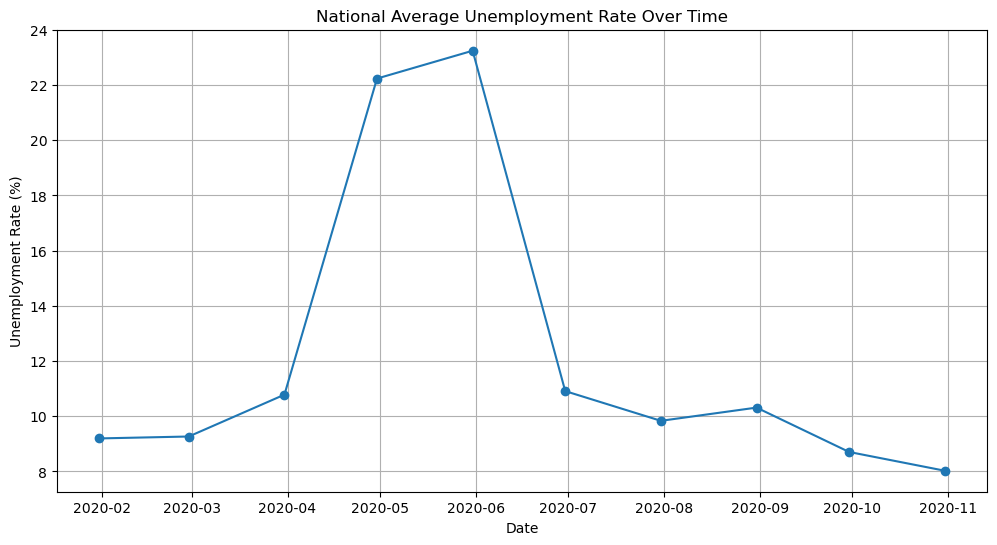

In [14]:
# National average unemployment trend
national_trend = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(12,6))
plt.plot(national_trend, marker='o', linestyle='-')
plt.title('National Average Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


# Regional Unemployment Trends

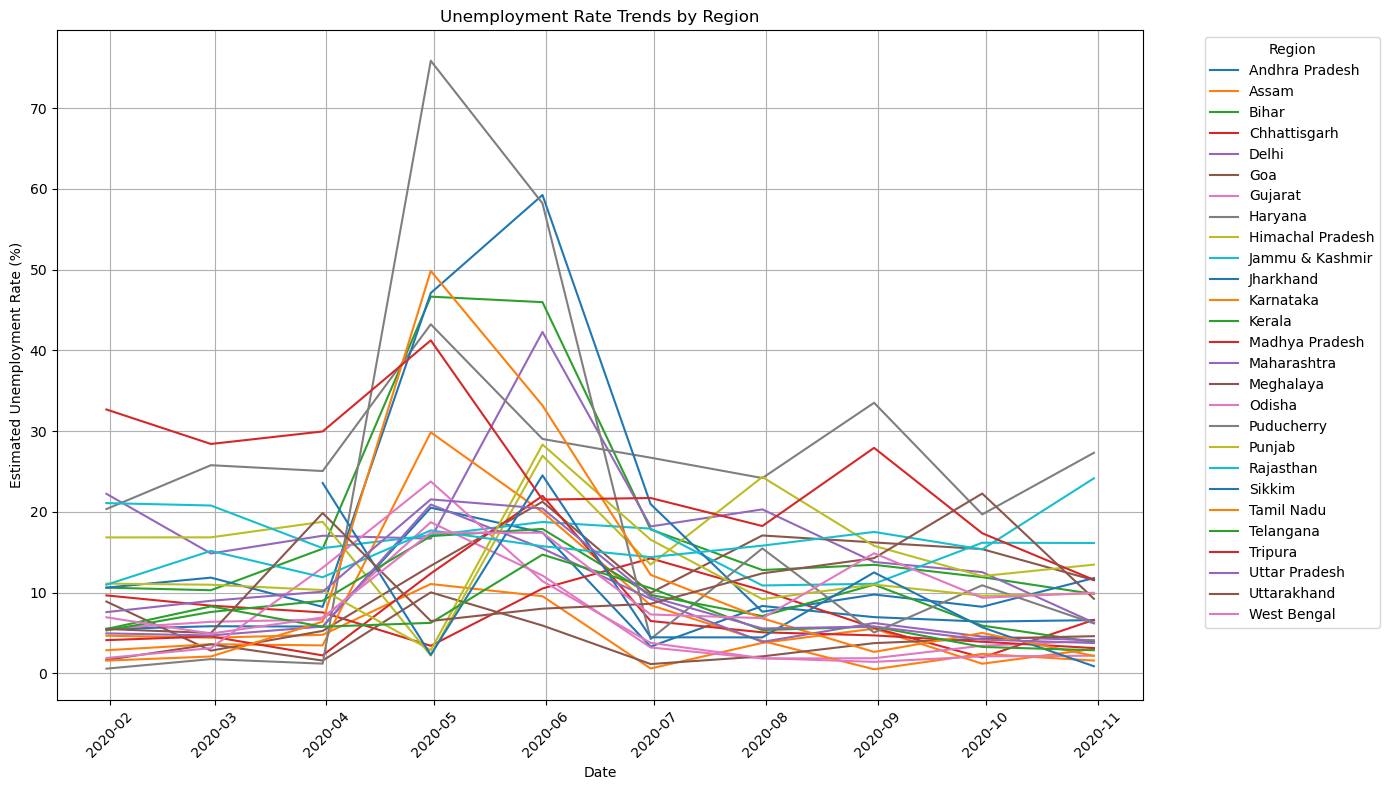


╒══════════════════╤════════════════════╤═══════════════════╕
│ Region           │ Before COVID (%)   │   After COVID (%) │
╞══════════════════╪════════════════════╪═══════════════════╡
│ Tripura          │ 30.54              │             23.69 │
├──────────────────┼────────────────────┼───────────────────┤
│ Haryana          │ 23.05              │             28.58 │
├──────────────────┼────────────────────┼───────────────────┤
│ Jammu & Kashmir  │ 20.93              │             15.21 │
├──────────────────┼────────────────────┼───────────────────┤
│ Delhi            │ 18.54              │             18.38 │
├──────────────────┼────────────────────┼───────────────────┤
│ Himachal Pradesh │ 16.84              │             15.87 │
├──────────────────┼────────────────────┼───────────────────┤
│ Rajasthan        │ 13.07              │             16.57 │
├──────────────────┼────────────────────┼───────────────────┤
│ Jharkhand        │ 11.23              │             21.62 │
├──────

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tabulate import tabulate

# Create Period column if it doesn't exist
if 'Period' not in df.columns:
    df['Period'] = df['Date'].apply(lambda x: 'Before COVID' if pd.to_datetime(x) < pd.to_datetime('2020-03-01') else 'After COVID')

# Define consistent region colors
regions = sorted(df['Region'].unique())
palette = sns.color_palette("tab10", n_colors=len(regions))
region_color_map = dict(zip(regions, palette))

# Plot: Unemployment trends by region
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)',
             hue='Region', palette=region_color_map)
plt.title('Unemployment Rate Trends by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()

# Calculate averages
region_avg = df.groupby(['Region', 'Period'])['Estimated Unemployment Rate (%)'].mean().unstack()
sorted_avg = region_avg.sort_values(by='Before COVID', ascending=False)


# Prepare and print fancy grid table
table_data = []
for region in sorted_avg.index:
    before = sorted_avg.loc[region, 'Before COVID']
    after = sorted_avg.loc[region, 'After COVID']
    
    # Format with red highlight for higher rate
    before_fmt = (red(f"{before:.2f}") if before > after else f"{before:.2f}") if pd.notna(before) else 'N/A'
    after_fmt = (red(f"{after:.2f}") if after > before else f"{after:.2f}") if pd.notna(after) else 'N/A'

    # Color region name
    r, g, b = [int(c * 255) for c in region_color_map[region]]
    region_colored = f"{rgb_to_ansi(r, g, b)}{bold(region)}\033[0m"
    
    table_data.append([region_colored, before_fmt, after_fmt])

print("\n" + tabulate(table_data, 
                     headers=['Region', 'Before COVID (%)', 'After COVID (%)'],
                     tablefmt='fancy_grid'))

# Analyze Covid-19 Impact 😷

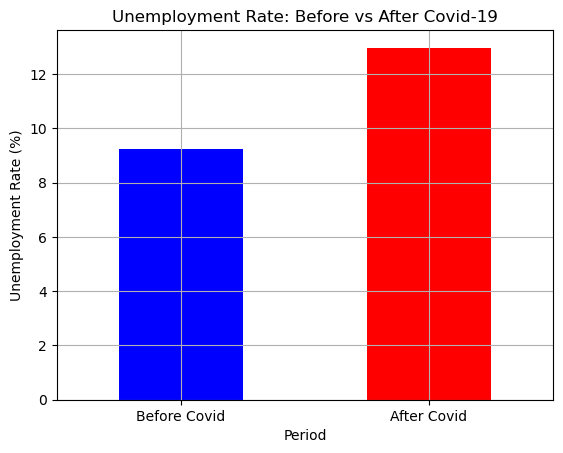

In [21]:
df['Period'] = df['Date'].apply(lambda x: 'Before Covid' if x < pd.to_datetime('2020-03-01') else 'After Covid')

# Group and sort to force order
covid_impact = df.groupby('Period')['Estimated Unemployment Rate (%)'].mean()
covid_impact = covid_impact.loc[['Before Covid', 'After Covid']]  # Force order

# Plot (now ordered correctly)
covid_impact.plot(kind='bar', color=['blue', 'red'])
plt.title('Unemployment Rate: Before vs After Covid-19')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

 # Identify Seasonal Patterns on Extracted month

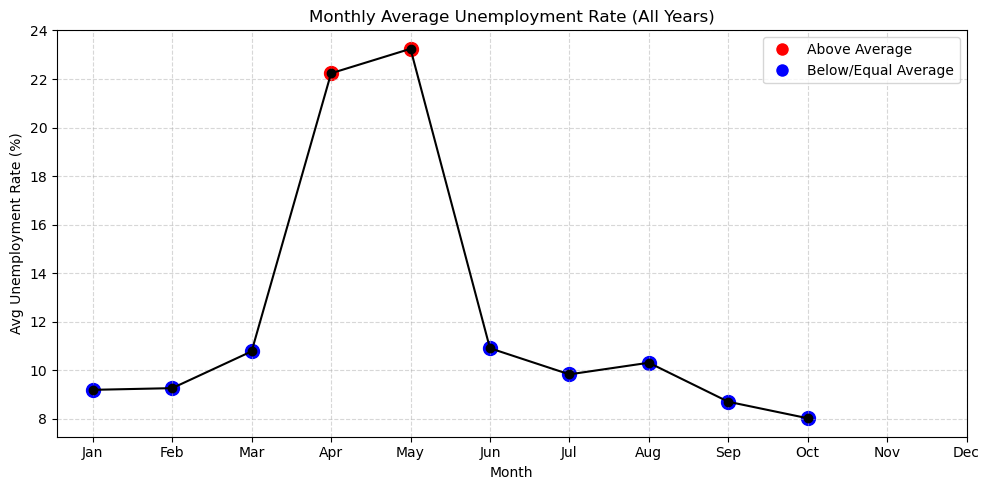

In [16]:
df['Month'] = df['Date'].dt.month

# Group by Month and calculate average unemployment rate
monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

# Overall average
overall_avg = monthly_avg.mean()

# Create color list: red if above average, blue otherwise
colors = ['red' if rate > overall_avg else 'blue'
          for rate in monthly_avg.values]

# Month labels for x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg.values, color='black', marker='o')
for i, (x, y) in enumerate(zip(monthly_avg.index, monthly_avg.values)):
    plt.scatter(x, y, color=colors[i], s=100)

# Axis and title
plt.xticks(ticks=range(1, 13), labels=month_names)
plt.xlabel('Month')
plt.ylabel('Avg Unemployment Rate (%)')
plt.title('Monthly Average Unemployment Rate (All Years)')
plt.grid(linestyle='--', alpha=0.5)

# Add legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Above Average', markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Below/Equal Average', markerfacecolor='blue', markersize=10)]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()


# 📊 Unemployment Rate Analysis in India – Insights & Policy Recommendations

---

## 📌 What Is the Unemployment Rate?

The **unemployment rate** is the percentage of people in the **labor force** who are **actively looking for a job but unable to find one**.

### 📐 Formula:

$$
\text{Unemployment Rate (\%)} = \left( \frac{\text{Unemployed People}}{\text{Labor Force}} \right) \times 100
$$


- **Unemployed**: People without a job, actively seeking work.
- **Labor Force**: Employed + Unemployed (but seeking) individuals.
- **Note**: This rate is calculated from the **angle of the labor force**, not the total population.

---

## 📉 1. National Unemployment Spike (April–June 2020)

**Insight:**  
- Unemployment **peaked sharply** between **April and June 2020**, reaching nearly **24% nationally**.
- This aligns with the **strictest COVID-19 lockdown phase**.

**Policy Suggestion:**  
- Create **emergency job protection programs**.
- Expand **digital/remote work infrastructure**.
- Improve **real-time labor tracking** for better crisis response.

---

## 📆 2. Monthly Pattern of Unemployment

**Insight:**  
- **April and May** show the **highest monthly average unemployment rates** across all years.
- Contrary to earlier assumptions, **July** shows **recovery**, not a peak.

**Policy Suggestion:**  
- Design **temporary employment schemes** during April–June.
- Provide **continued support** even after lockdowns to aid recovery.

---

## 🌍 3. Regional Disparities Before and After COVID

### 🧾 Key Observations:
- **Tripura** had the **highest pre-COVID unemployment** (30.54%).
- **Puducherry** (1.17% → 22.13%) and **Tamil Nadu** (1.83% → 14.78%) saw the **largest post-COVID spikes**.
- **Jharkhand, Bihar, Haryana** also had significant increases.
- A few like **Chhattisgarh** slightly improved after COVID.

### 🔴 Regions with Significant Spikes After COVID:

| Region        | Before (%) | After (%) |
|---------------|------------|-----------|
| Puducherry    | 1.17       | 22.13     |
| Tamil Nadu    | 1.83       | 14.78     |
| Bihar         | 10.45      | 21.73     |
| Jharkhand     | 11.23      | 21.62     |
| West Bengal   | 5.93       | 11.26     |
| Karnataka     | 3.23       | 8.78      |

**Policy Suggestions:**
- Deploy **targeted recovery programs** in these states.
- Encourage **private investment** in high-impact areas.
- Launch **workforce retraining** and digital upskilling programs.

---

## 🛠️ 4. Structural Challenges in Certain States

**Insight:**  
Regions like **Tripura**, **Jammu & Kashmir**, and **Delhi** had **high unemployment even before COVID**, suggesting **structural issues** beyond the pandemic.

**Policy Suggestion:**  
- Build **region-specific skill training centers**.
- Support **MSMEs and local enterprises** with credit and tax benefits.
- Promote **economic diversification** through infrastructure and education.

---

## 🧭 Final Summary

✔ **April–June 2020** marked the peak of unemployment during COVID.  
✔ **Some regions saw up to 10x increases** in joblessness.  
✔ **Tripura and similar states need long-term structural reform**.  
✔ Data-driven insights can help **tailor regional policies** and **build resilience** in the workforce.

> "Targeted employment policies must reflect not just national averages, but also regional realities."

---
